Q1. What is Gradient Boosting Regression? 

Gradient Boosting Regression is a machine learning technique used for regression tasks, which involve predicting a continuous numerical output based on input features. It is a type of ensemble learning method that combines the predictions of multiple individual models (usually decision trees) to create a stronger, more accurate final prediction.

The key idea behind gradient boosting is to iteratively train new models that focus on correcting the errors made by the previous models. This is achieved by fitting each new model to the residual errors (the differences between the predicted values and the actual target values) of the ensemble's current predictions. The new model is trained to minimize these residual errors, effectively learning to capture the patterns or relationships in the data that were missed by the previous models.

Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the model's
performance using metrics such as mean squared error and R-squared.

In [1]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=1000, n_features=1, n_informative=1, noise=22, random_state=45)

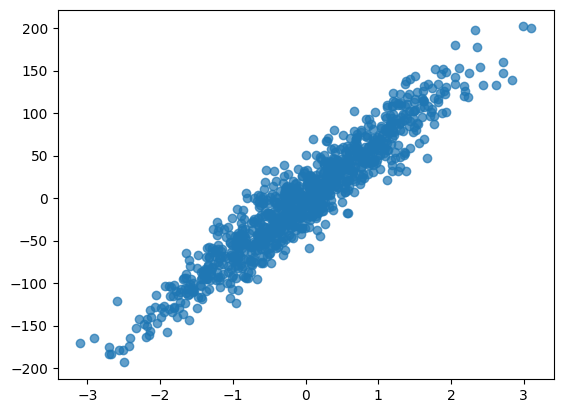

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,y,alpha=0.7)

In [3]:
## split dataset into train and tests sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=42)

In [4]:
xtrain.shape

(800, 1)

In [5]:
xtest.shape

(200, 1)

In [6]:
## define number of trees and learning rate
n_estimators = 1000
learning_rate = 0.001

In [7]:
# Initialize ensemble predictions to the mean of the target variable 
import numpy as np 
ensemble_preds = np.full_like(ytrain, np.mean(ytrain))

In [8]:
# Train the model using gradient boosting
from sklearn.tree import DecisionTreeRegressor
stubs = []
for i in range(n_estimators):
    # Compute the residual between the current predictions and the true target values
    residuals = ytrain - ensemble_preds
    
    # Fit a regression tree to the residuals
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(xtrain, residuals)

    stubs.append(tree)
    
    # Update the ensemble predictions with the current tree's predictions
    ensemble_preds += learning_rate * tree.predict(xtrain)

In [9]:
# evaluate the model on the test set
y_pred = np.full_like(ytest, np.mean(ytrain))
for i in range(n_estimators):
    y_pred += learning_rate * stubs[i].predict(xtest)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

In [11]:
print("Means squared error:", mse)
print("R-squared:", r2)

Means squared error: 1021.9943632433916
R-squared: 0.7617612928500878


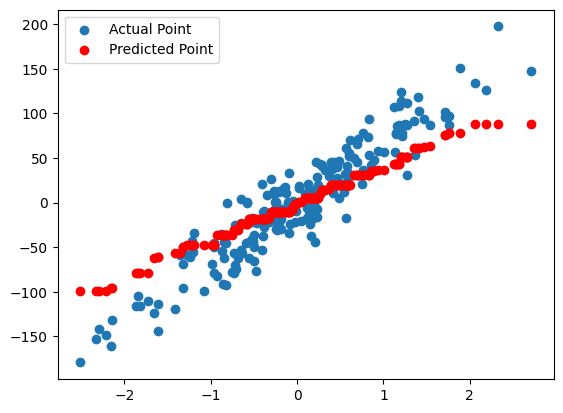

In [12]:
plt.scatter(xtest,ytest,label='Actual Point')
plt.scatter(xtest, y_pred,c='r',label='Predicted Point')
plt.legend()
plt.show()

Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters

In [21]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=5, n_informative=3, noise=10, random_state=42)

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
xtrain.shape

(800, 5)

In [24]:
xtest.shape

(200, 5)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

In [26]:
# Create a gradient boosting regressor object
gbm = GradientBoostingRegressor()

In [27]:
# Create a grid search object
grid_search = GridSearchCV(gbm, param_grid=param_grid,scoring='neg_mean_squared_error',cv=5, n_jobs=-1)


In [28]:
# Fit the grid search object to the data
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [29]:
# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score:  -161.94751026870475


In [30]:
# Evaluate the performance of the model on the test set
y_pred = grid_search.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  147.69129028237757
R-squared score:  0.9474099387691292


Q4. What is a weak learner in Gradient Boosting?

A weak learner in Gradient Boosting is like a small, humble contributor to a team effort. Individually, they might not be super smart, but when you put them together and let them learn from each other's mistakes, they become a powerful force that can understand complex things. It's like having a bunch of mini-experts who, even though they're not perfect, help the team get closer and closer to the right answer with each round of learning. 

Q5. What is the intuition behind the Gradient Boosting algorithm? 

The intuition behind the Gradient Boosting algorithm is like having a team of players who work together to improve their performance over time. Imagine you're playing a game where you want to reach a target score. At the beginning, you're not very good at the game, so you ask a more experienced friend for help.

1. Start Simple: Your friend watches you play and gives you some advice on how to improve your score. You make adjustments based on their advice and get a slightly better score.

2. Learning from Mistakes: Your friend focuses on the areas where you made mistakes and helps you correct them. You play again, and your score improves again.

3. Continuous Improvement: In each round, your friend hones in on the specific things you're not doing well and guides you to get better at those aspects. With each iteration, you're making fewer mistakes and getting closer to the target score.

4. Teamwork: As you keep playing and learning, your friend adapts their advice based on your previous performances. They're like a coach who adjusts their guidance to match your progress.

5. Strong Performance: Over time, with many rounds of playing and learning, your score gets remarkably close to the target. The combination of your efforts and your friend's guidance results in a much better performance than you could achieve on your own.

Q6. How does Gradient Boosting algorithm build an ensemble of weak learners? 

The Gradient Boosting algorithm builds an ensemble of weak learners in an iterative and sequential manner. The ensemble improves over time by focusing on the mistakes of previous learners. Here's a simplified step-by-step explanation of how Gradient Boosting builds this ensemble:

1. Start with a Simple Model: The algorithm begins with a simple model, often a constant prediction or a small model like a decision stump. This model serves as the initial prediction for the target variable.

2. Calculate Residuals: The algorithm calculates the difference between the actual target values and the predictions made by the current ensemble. These differences are called residuals or errors.

3. Fit a New Learner to Residuals: A new weak learner (like another decision stump) is trained to predict the residuals from the previous step. This learner is chosen because it can capture the patterns or relationships that were missed by the current ensemble.

4. Update Ensemble Predictions: The predictions made by the new weak learner are scaled by a small value (learning rate) and added to the predictions made by the previous ensemble. This combination results in updated predictions that aim to reduce the errors made by the ensemble.

5. Repeat the Process: Steps 2-4 are repeated for a fixed number of iterations or until a specific criterion is met. In each iteration, a new weak learner is trained to correct the mistakes of the previous ensemble. The algorithm gradually refines the predictions by repeatedly focusing on areas where the ensemble is making errors.

6. Final Ensemble Prediction: The final prediction of the Gradient Boosting model is the sum of the predictions made by all the weak learners in the ensemble. This collective effort results in a strong predictive model that can capture complex relationships in the data.

Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm? 

Constructing the mathematical intuition of the Gradient Boosting algorithm involves several steps that build upon each other. Here's a simplified outline of these steps:

1. Initialize Predictions: Start with an initial prediction for the target variable. This could be a simple estimate, like the average of all target values.

2. Compute Residuals: Calculate the difference between the actual target values and the current predictions. These differences are the residuals, which represent the errors made by the current model.

3. Train Weak Learner: Fit a weak learner (like a decision stump) to the residuals. The weak learner aims to capture the patterns or relationships that were missed by the current model.

4. Calculate Step Size: Determine how much to adjust the predictions made by the weak learner. This is often scaled by a small value known as the learning rate.

5. Update Predictions: Add the scaled predictions of the weak learner to the current predictions. This update is performed to reduce the errors made by the ensemble.

6. Repeat Steps 2-5: Iterate through steps 2 to 5 for a fixed number of iterations or until a stopping criterion is met. In each iteration, a new weak learner is trained to correct the errors of the previous ensemble.

7. Final Ensemble Prediction: The final prediction of the Gradient Boosting model is the sum of the predictions made by all the weak learners. This ensemble prediction aims to capture the complex relationships in the data by iteratively correcting the errors.